In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [2]:
data = pd.read_csv('Data/data_with_vectors.csv')

In [3]:
data

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,r_len,q1_words,q2_words,...,86q2,87q2,88q2,89q2,90q2,91q2,92q2,93q2,94q2,95q2
0,0,0,1,2,step step guid invest share market india,step step guid invest share market,0,1.157895,14,12,...,18.996169,-20.792302,-22.099690,-39.491452,-25.912614,-12.067960,16.488814,40.195788,-14.407949,-2.594384
1,1,1,3,4,stori kohinoor koh i noor diamond,would happen indian govern stole kohinoor koh ...,0,0.579545,8,13,...,14.065927,-32.599546,-54.725100,5.573329,-19.255911,-20.936302,14.818417,39.671840,10.103314,9.297360
2,2,2,5,6,increas speed internet connect use vpn,internet speed increas hack dn,0,1.237288,14,10,...,-10.416016,-22.239469,-7.408381,-20.735026,-12.088432,-12.295888,-10.115664,35.265050,16.605785,16.955342
3,3,3,7,8,mental lone solv,find remaind math math divid,0,0.769231,11,9,...,5.878617,-14.109877,-15.244852,-6.924014,-9.974960,-26.881352,0.288322,38.630093,3.197422,-6.494623
4,4,4,9,10,one dissolv water quikli sugar salt methan car...,fish would surviv salt water,0,1.948718,13,7,...,17.013748,-8.558105,-20.063761,2.328464,-28.234996,-12.931378,0.076697,22.908110,-0.293697,-8.849080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,404282,404285,433578,379845,mani keyword racket program languag latest ver...,mani keyword perl program languag latest version,0,1.075949,14,13,...,5.165456,-11.464328,-1.075705,-48.533878,-5.871400,-31.292594,-2.277079,10.066749,-26.098974,11.197278
404283,404283,404286,18840,155606,believ life death,true life death,1,0.976190,8,9,...,-10.910187,-17.369496,-5.371824,-7.351629,-1.781602,-5.029964,7.696611,6.667526,8.021969,-5.381291
404284,404284,404287,537928,537929,one coin,own coin,0,1.000000,4,3,...,1.919942,-8.093113,-4.486509,-4.305888,-0.647508,6.759025,2.776058,9.318659,3.572573,-7.075776
404285,404285,404288,537930,537931,approx annual cost live studi uic chicago indi...,littl hairfal problem want use hair style prod...,0,0.740157,17,25,...,30.862432,-37.270439,-49.603633,37.502799,-39.455253,-51.782338,21.501225,58.417728,-7.236231,12.738594


In [4]:
data.drop(['Unnamed: 0','id','question1','question2'],axis = 1,inplace = True)

In [5]:
data

,qid1,qid2,is_duplicate,r_len,q1_words,q2_words,c_words,token_set_ratio,token_sort_ratio,fuzz_ratio,...,86q2,87q2,88q2,89q2,90q2,91q2,92q2,93q2,94q2,95q2
0,1,2,0,1.157895,14,12,10,100,92,92,...,18.996169,-20.792302,-22.099690,-39.491452,-25.912614,-12.067960,16.488814,40.195788,-14.407949,-2.594384
1,3,4,0,0.579545,8,13,4,90,63,63,...,14.065927,-32.599546,-54.725100,5.573329,-19.255911,-20.936302,14.818417,39.671840,10.103314,9.297360
2,5,6,0,1.237288,14,10,4,85,74,56,...,-10.416016,-22.239469,-7.408381,-20.735026,-12.088432,-12.295888,-10.115664,35.265050,16.605785,16.955342
3,7,8,0,0.769231,11,9,0,26,27,27,...,5.878617,-14.109877,-15.244852,-6.924014,-9.974960,-26.881352,0.288322,38.630093,3.197422,-6.494623
4,9,10,0,1.948718,13,7,2,53,42,42,...,17.013748,-8.558105,-20.063761,2.328464,-28.234996,-12.931378,0.076697,22.908110,-0.293697,-8.849080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,433578,379845,0,1.075949,14,13,11,95,88,92,...,5.165456,-11.464328,-1.075705,-48.533878,-5.871400,-31.292594,-2.277079,10.066749,-26.098974,11.197278
404283,18840,155606,1,0.976190,8,9,5,80,62,75,...,-10.910187,-17.369496,-5.371824,-7.351629,-1.781602,-5.029964,7.696611,6.667526,8.021969,-5.381291
404284,537928,537929,0,1.000000,4,3,1,88,88,88,...,1.919942,-8.093113,-4.486509,-4.305888,-0.647508,6.759025,2.776058,9.318659,3.572573,-7.075776
404285,537930,537931,0,0.740157,17,25,1,37,37,36,...,30.862432,-37.270439,-49.603633,37.502799,-39.455253,-51.782338,21.501225,58.417728,-7.236231,12.738594


In [6]:
x = data.drop(['is_duplicate'],axis = 1)
y = data['is_duplicate']


In [7]:
x

,qid1,qid2,r_len,q1_words,q2_words,c_words,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,...,86q2,87q2,88q2,89q2,90q2,91q2,92q2,93q2,94q2,95q2
0,1,2,1.157895,14,12,10,100,92,92,100,...,18.996169,-20.792302,-22.099690,-39.491452,-25.912614,-12.067960,16.488814,40.195788,-14.407949,-2.594384
1,3,4,0.579545,8,13,4,90,63,63,94,...,14.065927,-32.599546,-54.725100,5.573329,-19.255911,-20.936302,14.818417,39.671840,10.103314,9.297360
2,5,6,1.237288,14,10,4,85,74,56,60,...,-10.416016,-22.239469,-7.408381,-20.735026,-12.088432,-12.295888,-10.115664,35.265050,16.605785,16.955342
3,7,8,0.769231,11,9,0,26,27,27,31,...,5.878617,-14.109877,-15.244852,-6.924014,-9.974960,-26.881352,0.288322,38.630093,3.197422,-6.494623
4,9,10,1.948718,13,7,2,53,42,42,50,...,17.013748,-8.558105,-20.063761,2.328464,-28.234996,-12.931378,0.076697,22.908110,-0.293697,-8.849080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404282,433578,379845,1.075949,14,13,11,95,88,92,90,...,5.165456,-11.464328,-1.075705,-48.533878,-5.871400,-31.292594,-2.277079,10.066749,-26.098974,11.197278
404283,18840,155606,0.976190,8,9,5,80,62,75,80,...,-10.910187,-17.369496,-5.371824,-7.351629,-1.781602,-5.029964,7.696611,6.667526,8.021969,-5.381291
404284,537928,537929,1.000000,4,3,1,88,88,88,88,...,1.919942,-8.093113,-4.486509,-4.305888,-0.647508,6.759025,2.776058,9.318659,3.572573,-7.075776
404285,537930,537931,0.740157,17,25,1,37,37,36,41,...,30.862432,-37.270439,-49.603633,37.502799,-39.455253,-51.782338,21.501225,58.417728,-7.236231,12.738594


In [8]:
y

0         0
1         0
2         0
3         0
4         0
         ..
404282    0
404283    1
404284    0
404285    0
404286    0
Name: is_duplicate, Length: 404287, dtype: int64

In [9]:

(y.value_counts()/len(y))*100

0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64

In [10]:
x.describe()

,qid1,qid2,r_len,q1_words,q2_words,c_words,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,...,86q2,87q2,88q2,89q2,90q2,91q2,92q2,93q2,94q2,95q2
count,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,...,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000,404287.000000
mean,217243.151093,220955.212082,1.110651,10.942256,11.182017,4.511619,77.566459,65.030706,62.447702,70.277637,...,9.710591,-14.657233,-16.559935,0.404952,-8.807252,-9.757545,7.687286,22.816910,0.301594,3.164671
std,157751.614317,159903.168488,0.610160,5.428812,6.305210,3.098609,21.068160,19.709638,20.434485,20.117644,...,13.084776,16.471864,13.431724,22.128755,14.888889,15.000206,14.568160,17.455182,14.412589,11.928753
min,1.000000,2.000000,0.006711,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-52.619932,-282.684132,-407.942102,-233.724122,-206.754574,-265.279771,-129.800840,-34.860548,-142.779540,-83.416352
25%,74436.500000,74726.500000,0.793651,7.000000,7.000000,2.000000,64.000000,51.000000,46.000000,54.000000,...,1.327518,-22.672036,-22.600277,-13.379483,-17.003835,-17.101791,-1.701473,11.081756,-6.976933,-4.139626
50%,192181.000000,197053.000000,1.000000,10.000000,10.000000,4.000000,82.000000,65.000000,62.000000,70.000000,...,7.595238,-12.615253,-14.545198,-0.957055,-8.268810,-8.044914,5.605256,19.283727,1.736308,2.411236
75%,346573.000000,354692.000000,1.271186,13.000000,13.000000,6.000000,100.000000,80.000000,79.000000,86.000000,...,15.562436,-4.449017,-8.216960,13.168368,0.190083,-0.615888,14.700843,30.413652,9.135442,9.641618
max,537932.000000,537933.000000,117.000000,125.000000,237.000000,41.000000,100.000000,100.000000,100.000000,100.000000,...,244.347699,123.583015,76.444307,455.873451,107.406744,149.474167,288.105724,440.430492,103.619374,184.903000


In [11]:
y.describe()

count    404287.000000
mean          0.369201
std           0.482589
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: is_duplicate, dtype: float64

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Columns: 202 entries, qid1 to 95q2
dtypes: float64(193), int64(9)
memory usage: 623.1 MB


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y,test_size = 0.30)

In [14]:
print('Number of data points in train data- ', x_train.shape)
print('='*50)
print('Number of data points in test data- ', x_test.shape)

Number of data points in train data-  (283000, 202)
Number of data points in test data-  (121287, 202)


In [15]:
print('Distribution of class in train data---')
print('Class 0: {0} % and Class 1: {1} %'.format(len(y_train[y_train==0])*100/len(y_train),len(y_train[y_train==1])*100/len(y_train),))
print('='*50)
print('Distribution of class in test data---')
print('Class 0: {0} % and Class 1: {1} %'.format(len(y_test[y_test==0])*100/len(y_test),len(y_test[y_test==1])*100/len(y_test)))

Distribution of class in train data---
Class 0: 63.07985865724382 % and Class 1: 36.92014134275618 %
Distribution of class in test data---
Class 0: 63.08013224830361 % and Class 1: 36.91986775169639 %


In [144]:
def prediction_visualization(y_pred,y_test):
    confusion_Matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(confusion_Matrix,fmt = '0.2f',annot = True)
    l_loss = log_loss(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    print('Log Loss- ',l_loss)
    print('Accuracy- ',accuracy)
    result = {}
    result['log loss'] = l_loss
    result['accuracy'] = accuracy
    return(result)

# Logistic Regression

   Here we used logistic regression using sklearn and used GridSearchCV for best parameters 

In [82]:
log_reg = LogisticRegression(max_iter=1000,verbose = True,n_jobs = 6,class_weight = 'balanced')
parameters = {'penalty':['l2'],'C':[1,10], 'fit_intercept':(True,False), 'class_weight':('balanced',None)}
clf = GridSearchCV(log_reg,parameters)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  2.0min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  2.7min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  3.6min finished
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 out of   1 | elapsed:  1

In [83]:
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

Log Loss-  9.856522583428724
Accuracy-  0.714627288992225


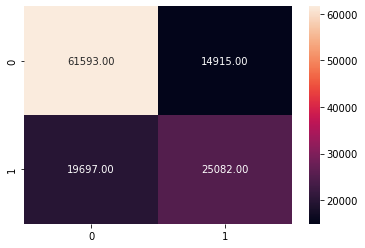

In [84]:
res = prediction_visualization(y_pred,y_test)

In [85]:
res

{'log loss': 9.856522583428724, 'accuracy': 0.714627288992225}

In [26]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in tqdm(alpha):
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predict_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))



 14%|█▍        | 1/7 [11:09<1:06:58, 669.73s/it]

For values of alpha =  1e-05 The log loss is: 0.6585278257455169


 29%|██▊       | 2/7 [22:56<57:37, 691.58s/it]  

For values of alpha =  0.0001 The log loss is: 0.6585278257455169


 43%|████▎     | 3/7 [34:50<46:47, 701.91s/it]

For values of alpha =  0.001 The log loss is: 0.6585278257455169


 57%|█████▋    | 4/7 [45:12<33:31, 670.43s/it]

For values of alpha =  0.01 The log loss is: 0.6585278257455169


 71%|███████▏  | 5/7 [56:26<22:23, 671.70s/it]

For values of alpha =  0.1 The log loss is: 0.5981053480120426


 86%|████████▌ | 6/7 [1:08:38<11:32, 692.21s/it]

For values of alpha =  1 The log loss is: 0.564795485404773


100%|██████████| 7/7 [1:21:59<00:00, 702.77s/it]

For values of alpha =  10 The log loss is: 0.5853981814484218


NameError: name 'plt' is not defined

 Log Loss is minimum for alpha = 1
 in logistic regression

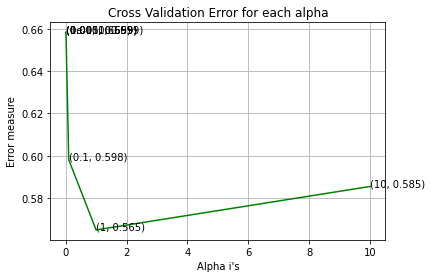

For values of best alpha =  1 The train log loss is: 0.5651866003415055
For values of best alpha =  1 The test log loss is: 0.564795485404773
Total number of data points : 121287


In [39]:
fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))


Log Loss-  9.666070968654424
Accuracy-  0.7201431315804662


{'log loss': 9.666070968654424, 'accuracy': 0.7201431315804662}

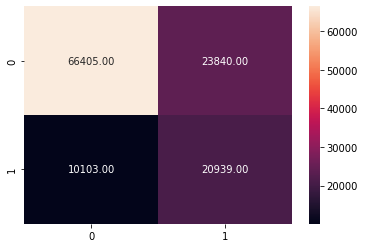

In [30]:
prediction_visualization(y_test, predicted_y)

for alpha = 1 log loss is minimum


# XGBoost


In [57]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(x_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

C:\Users\Aakash\anaconda3\envs\GPU\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[0]	train-logloss:0.68694	valid-logloss:0.68695
[10]	train-logloss:0.63600	valid-logloss:0.63620
[20]	train-logloss:0.59901	valid-logloss:0.59937
[30]	train-logloss:0.57147	valid-logloss:0.57202
[40]	train-logloss:0.55017	valid-logloss:0.55094
[50]	train-logloss:0.53330	valid-logloss:0.53434
[60]	train-logloss:0.51990	valid-logloss:0.52111
[70]	train-logloss:0.50921	valid-logloss:0.51053
[80]	train-logloss:0.50044	valid-logloss:0.50185
[90]	train-logloss:0.49326	valid-logloss:0.49477
[100]	train-logloss:0.48717	valid-logloss:0.48876
[110]	train-logloss:0.48200	valid-logloss:0.48373
[120]	train-logloss:0.47734	valid-logloss:0.47920
[130]	train-logloss:0.47323	valid-logloss:0.47517
[140]	train-logloss:0.46973	valid-logloss:0.47173
[150]	train-logloss:0.46666	valid-logloss:0.46874
[160]	train-logloss:0.46386	valid-logloss:0.46602
[170]	train-logloss:0.46154	valid-logloss:0.46378
[180]	train-logloss:0.45928	valid-logloss:0.46158
[190]	train-logloss:0.45722	valid-logloss:0.45959
[200]	train

In [78]:
y_pred = np.round(predict_y)
y_pred = y_pred.astype(int)
print(len(y_pred),len(y_test))

121287 121287


Log Loss-  7.854299828307877
Accuracy-  0.7725972280623645


{'log loss': 7.854299828307877, 'accuracy': 0.7725972280623645}

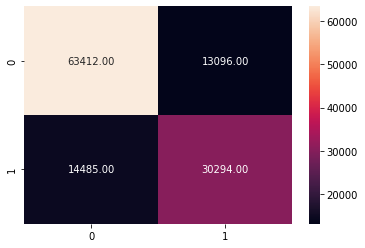

In [79]:
prediction_visualization(y_pred,y_test)

# Naive Bayes 

In [86]:
clf = GaussianNB()
clf.fit(x_train,y_train)

GaussianNB()

In [87]:
y_pred = clf.predict(x_test)

In [88]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

Log Loss-  14.567076136276695
Accuracy-  0.5782482871206313


{'log loss': 14.567076136276695, 'accuracy': 0.5782482871206313}

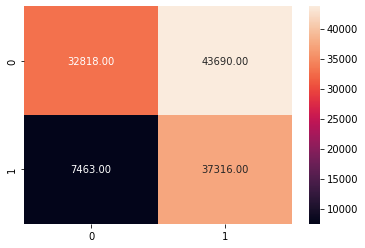

In [89]:
prediction_visualization(y_pred,y_test)


# KNN classifier

In [94]:
knn = KNeighborsClassifier(n_neighbors=7,n_jobs = 6,weights = 'distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=6, weights='distance')

In [95]:
y_pred = knn.predict(x_test)

In [96]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

Log Loss-  10.556223149755436
Accuracy-  0.6943695532085055


{'log loss': 10.556223149755436, 'accuracy': 0.6943695532085055}

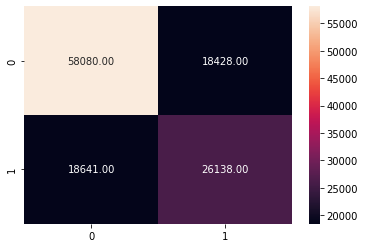

In [97]:
prediction_visualization(y_pred,y_test)

# Decision Tree classifier

In [133]:
clf_tree = DecisionTreeClassifier(class_weight = 'balanced',max_leaf_nodes = None)
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [134]:
y_pred = clf_tree.predict(x_test)

Log Loss-  9.383816161204676
Accuracy-  0.7283138341289669


{'log loss': 9.383816161204676, 'accuracy': 0.7283138341289669}

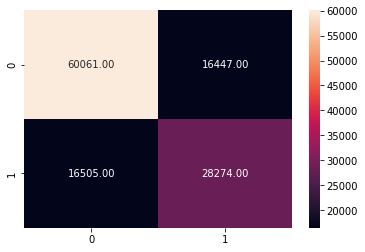

In [145]:
prediction_visualization(y_pred,y_test)